In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

# Set plotting style and figure DPI (consider moving these to a configuration file)
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 150

# Load the CSV files
# Dropping unnamed columns from the 66 stock returns
returns_data = pd.read_csv(r"C:\Users\adhit\OneDrive\desktop\GDS\Green Data Science project\DATA\Market Price_66 stocks.csv", index_col='Date', parse_dates=True, usecols=range(67))
market_cap_data = pd.read_csv(r"C:\Users\adhit\OneDrive\desktop\GDS\Green Data Science project\DATA\Market Cap_66 stocks.csv", index_col='Date', parse_dates=True)
emissions_data = pd.read_csv(r"C:\Users\adhit\OneDrive\desktop\GDS\Green Data Science project\DATA\Emissions Data_66 stocks.csv")
print(market_cap_data.head())
print(returns_data.head())

                    AA         AEO         AIZ           AKR          AMP  \
Date                                                                        
2019-06-01  4343367421  2910587780  6539676671  2.265383e+09  19437547898   
2019-07-01  4173184644  3046644842  6968769952  2.370594e+09  19042946375   
2019-08-01  3327043160  2896809850  7519100700  2.309788e+09  16879659291   
2019-09-01  3724448444  2740580801  7691489838  2.413665e+09  19251030250   
2019-10-01  3858060944  2598651832  7706772563  2.432830e+09  19117096670   

                    APH         APO          AVB         AWR           AXP  \
Date                                                                         
2019-06-01  28660373120  6874958367  28323957008  2768472202  1.030000e+11   
2019-07-01  27757863971  6614374371  29158973129  2850525538  1.030000e+11   
2019-08-01  26038613502  7575733806  29685479804  3408052654  9.986782e+10   
2019-09-01  28703749177  8411292655  30074667159  3309711569  9.813380

In [4]:
# Adjust market_cap_data to match the columns of returns_data
market_cap_data = market_cap_data[returns_data.columns]

In [5]:
# Calculate weights ensuring they sum to 1
total_market_cap = market_cap_data.iloc[-1].sum()
weights = market_cap_data.iloc[-1] / total_market_cap

In [6]:
# Descriptive Statistics 
aligned_log_returns = returns_data
portfolio_log_returns = (aligned_log_returns * weights).sum(axis=1)
annualized_mean = (1 + portfolio_log_returns).prod()**(12 / len(portfolio_log_returns)) - 1
annualized_std = np.std(portfolio_log_returns) * np.sqrt(12)
min_return = np.min(portfolio_log_returns)
max_return = np.max(portfolio_log_returns)
percentiles = np.percentile(portfolio_log_returns, [25, 50, 75])

In [7]:
# Print the statistics
print("Annualized Descriptive Statistics for the Market Capitalisation Based Portfolio Log Returns:")
print(f"Mean (compounded annually): {annualized_mean:.4f}")
print(f"Standard Deviation (annualized): {annualized_std:.4f}")
print(f"Minimum: {min_return:.4f}")
print(f"Maximum: {max_return:.4f}")
print(f"25%: {percentiles[0]:.4f}")
print(f"50% (median): {percentiles[1]:.4f}")
print(f"75%: {percentiles[2]:.4f}")

Annualized Descriptive Statistics for the Market Capitalisation Based Portfolio Log Returns:
Mean (compounded annually): 0.1836
Standard Deviation (annualized): 0.2137
Minimum: -0.2029
Maximum: 0.1639
25%: -0.0193
50% (median): 0.0193
75%: 0.0533


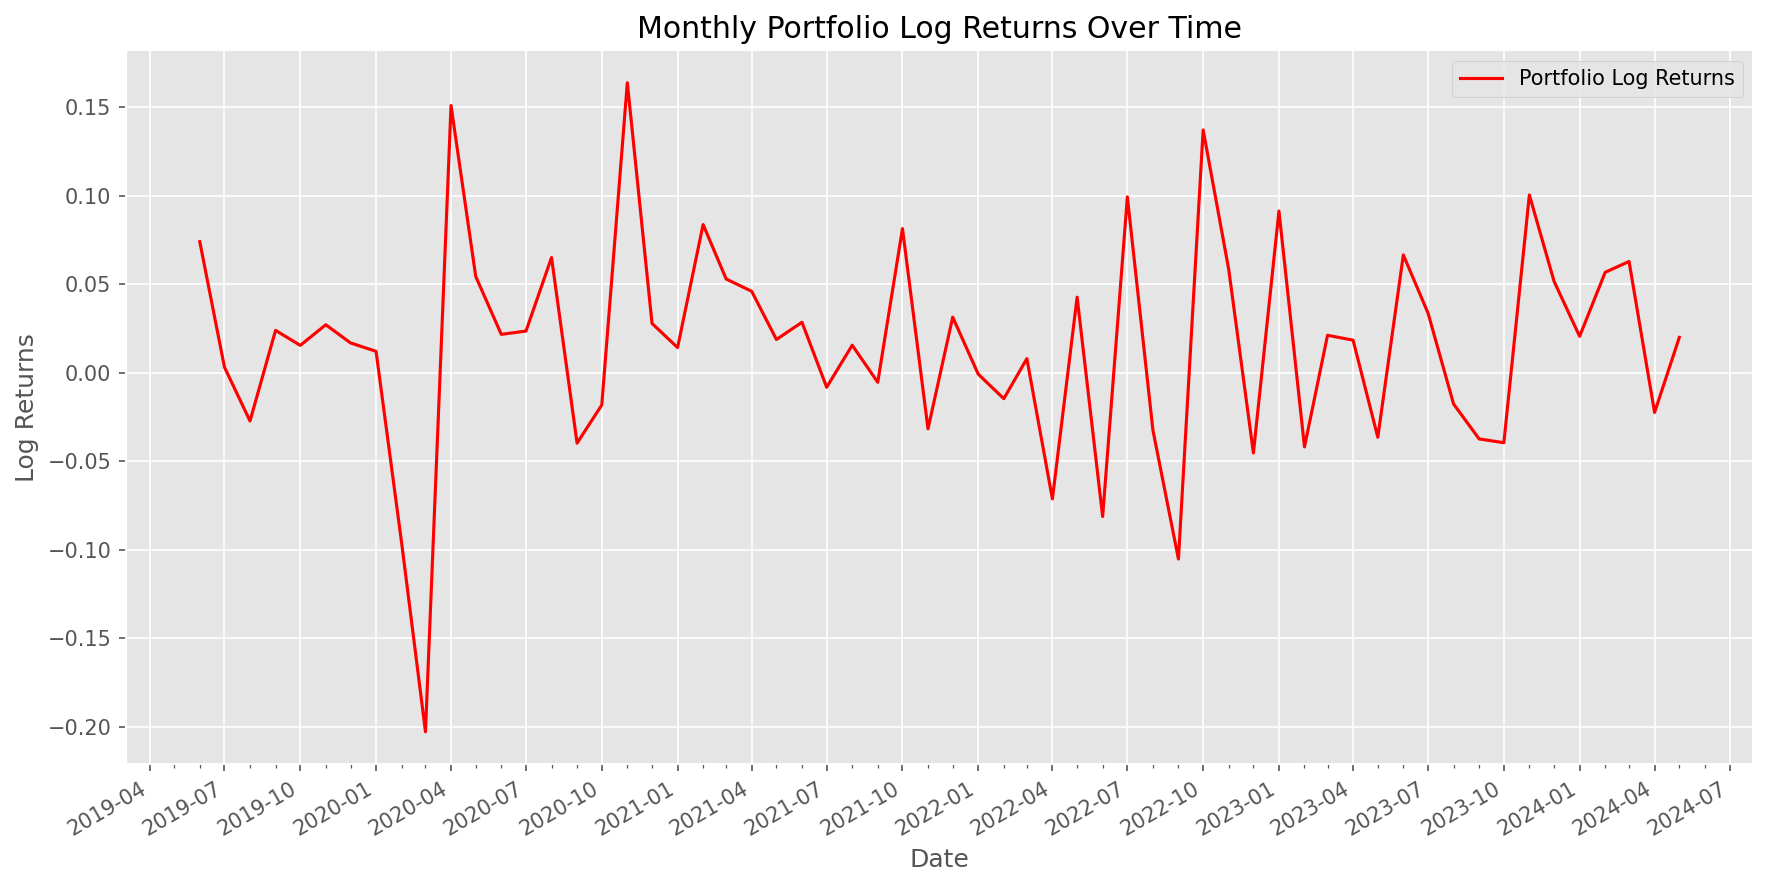

In [8]:
# Plotting the portfolio log returns
plt.figure(figsize=(14, 7))
ax = plt.gca()
ax.plot(portfolio_log_returns.index, portfolio_log_returns.values, label='Portfolio Log Returns', color='red')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # Major ticks every quarter
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format major ticks
plt.gcf().autofmt_xdate()  # Auto rotates dates to fit them better
plt.title('Monthly Portfolio Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

In [12]:
# Data Cleansing
emissions_data.columns = emissions_data.columns.str.strip()
emissions_data = emissions_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [14]:
print(emissions_data.columns)

Index(['CO2 Equivalent Emissions Direct, Scope 1',
       'CO2 Equivalent Emissions Indirect, Scope 2', 'Total Revenue',
       'Carbon Intensity'],
      dtype='object')


In [17]:
# List of new instrument names
new_instruments = ['AA', 'AEO', 'AIZ', 'AKR', 'AMP', 'APH', 'APO', 'AVB', 'AWR', 'AXP', 'AXS', 'BAH', 'BFb', 'BJ', 'BRX', 'BV', 'CHH', 'CNC', 'CRM', 'D', 'DOC', 'DPZ', 'EAT', 'EL', 'FAF', 'FDX', 'FND', 'GE', 'GM', 'GS', 'HD', 'HES', 'HIW', 'HRB', 'HWM', 'IFF', 'IQV', 'IR', 'LEN', 'MDU', 'MKC', 'MRO', 'MTX', 'NEE', 'NFG', 'NOW', 'OXY', 'PEG', 'PNM', 'PPL', 'PRU', 'RYI', 'SLG', 'SPG', 'SQ', 'TDY', 'THS', 'TYL', 'UE', 'VZ', 'W', 'WHR', 'WOR', 'WSR', 'XHR', 'XOM']

# Ensure the list length matches the DataFrame length
if len(new_instruments) == len(emissions_data):
    # Replace the 'Instrument' column with the new list
    emissions_data['Instrument'] = new_instruments
else:
    print(f"Error: The length of the new instrument list ({len(new_instruments)}) does not match the length of the emissions_data DataFrame ({len(emissions_data)})")

In [18]:
# Map tickers to Carbon Intensity from 'Emissions.csv'
emissions_data.set_index('Instrument', inplace=True)
carbon_intensity = emissions_data.loc[returns_data.columns, 'Carbon Intensity']

In [23]:
# Calculate the weighted Carbon Intensity

weights = pd.to_numeric(weights, errors='coerce')
carbon_intensity = pd.to_numeric(carbon_intensity, errors='coerce')
weights = weights.fillna(0)  # or use weights = weights.dropna() if dropping NaNs is appropriate
carbon_intensity = carbon_intensity.fillna(carbon_intensity.mean())  # or use dropna()
weighted_carbon_intensity = weights * carbon_intensity
median_weighted_Carbon_Intensity = np.median(weighted_carbon_intensity)
print(weighted_carbon_intensity)
print("Median of Emissions Scaled by Revenue:", median_weighted_Carbon_Intensity)

AA      0.212022
AEO     0.017398
AIZ     0.003696
AKR     0.011366
AMP     0.025335
         ...    
WHR     0.035275
WOR     0.054925
WSR     0.004252
XHR     0.034060
XOM    49.511465
Length: 66, dtype: float64
Median of Emissions Scaled by Revenue: 0.08409734976084882


In [26]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Ticker': returns_data.columns,
    'Weight': weights,
    'Carbon Intensity': carbon_intensity,
    'Weighted Carbon Intensity': weighted_carbon_intensity
})

# Save results to CSV
results.to_csv('weighted_carbon_intensity.csv', index=False)